In [481]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

## Describe the problem

## Analyze the data

In [482]:
df = pd.read_csv("data.csv")
df_test = df.sample(frac=0.2, random_state=25)
df = df.drop(df_test.index)
TARGET = "stroke"
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1


In [483]:
df.shape

(4088, 12)

### Create plot functions

In [484]:
def ratioPlot(df,name):
    df_to_plot = df[name].value_counts()
    df_to_plot.plot.barh(color="#21252B")
    for index, value in enumerate(df_to_plot):
        plt.text(value, index, str(value),ha="left",va="center")
    plt.show()
    df_to_plot = df[[name,TARGET]].groupby([name]).value_counts()
    df_to_plot.plot.barh(color="#21252B")
    for index, value in enumerate(df_to_plot):
            plt.text(value, index, str(value),ha="left",va="center")

    plt.show()        
    
def ratioPrint(df,name):
    print("LABELS")
    total = df.shape[0]
    for index,label in zip(df[name].unique(),df[name].value_counts()):
        print(" ",index,"->",label,",",f'{int(label/total*100)}%')
    print()
    print("LABELS WITH STROKE")
    labels = df[[name,TARGET]].groupby([name]).value_counts().keys()
    labels_total = df[[name,TARGET]].groupby(name).count()[TARGET]
    cnt = 0
    for index,label in zip(labels,df[[name,TARGET]].groupby([name]).value_counts()):
        print(" ",index,"->",label,",",f'{int(label/total*100)}%',f'{int(label/labels_total.iloc[cnt//2]*100)}%')
        cnt+=1
    

### Stroke

Check healthy to ill ratio

([<matplotlib.patches.Wedge at 0x240d0f4df10>,
 [Text(-1.0870328243268486, 0.16840320316429608, 'HEALTHY'),
  Text(1.185853994474847, -0.18371255751322516, 'ILL')],
 [Text(-0.5929269950873718, 0.09185629263507057, '95.1%'),
  Text(0.6917481634436606, -0.10716565854938134, '4.9%')])

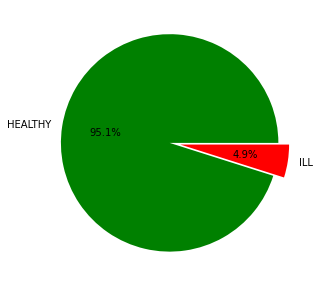

In [485]:
plt.pie(df[TARGET].value_counts(), autopct='%1.1f%%', explode=[0,0.1], labels=["HEALTHY","ILL"], colors=["green","red"])

As expected a great deal more patients are healthy. Such a huge difference may be problematic during training the models

### Id

Completely useless. Will be deleted

In [486]:
df.drop("id",axis = 1, inplace = True)

### Gender

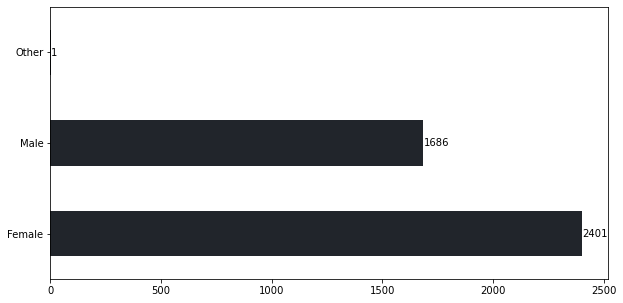

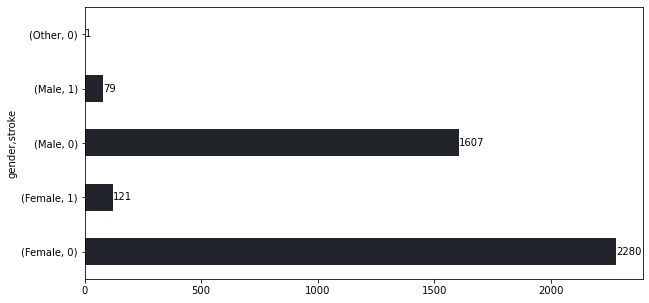

In [487]:
ratioPlot(df,"gender")

In [488]:
ratioPrint(df,"gender")

LABELS
  Male -> 2401 , 58%
  Female -> 1686 , 41%
  Other -> 1 , 0%

LABELS WITH STROKE
  ('Female', 0) -> 2280 , 55% 94%
  ('Female', 1) -> 121 , 2% 5%
  ('Male', 0) -> 1607 , 39% 95%
  ('Male', 1) -> 79 , 1% 4%
  ('Other', 0) -> 1 , 0% 100%


In [489]:
df.drop(df.index[df["gender"] == "Other"], inplace=True)
df["gender"].replace(["Male","Female"],[0,1],inplace=True)

Since there is only one Other in gender column we can delete it to simplify the data. Also we replace Male/Female with 0/1 so third option would be problematic

### Age

In [490]:
df["age"].nunique()

104

Since the're so many different values for age, I will divide them into groups (0 - the youngest group, 5 - the oldest)

In [491]:
df['age'] = pd.qcut(df['age'], q=[0, .3, .6, .7, .8, .9, 1], labels=[0,1,2,3,4,5])
ratioPrint(df,'age')

LABELS
  4 -> 1257 , 30%
  3 -> 1200 , 29%
  1 -> 444 , 10%
  5 -> 422 , 10%
  2 -> 398 , 9%
  0 -> 366 , 8%

LABELS WITH STROKE
  (0, 0) -> 1256 , 30% 99%
  (0, 1) -> 1 , 0% 0%
  (1, 0) -> 1180 , 28% 98%
  (1, 1) -> 20 , 0% 1%
  (2, 0) -> 402 , 9% 95%
  (2, 1) -> 20 , 0% 4%
  (3, 0) -> 372 , 9% 93%
  (3, 1) -> 26 , 0% 6%
  (4, 0) -> 392 , 9% 88%
  (4, 1) -> 52 , 1% 11%
  (5, 0) -> 285 , 6% 77%
  (5, 1) -> 81 , 1% 22%


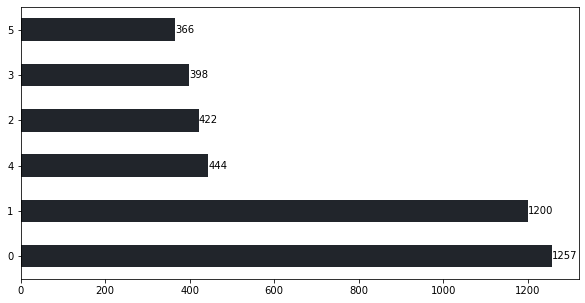

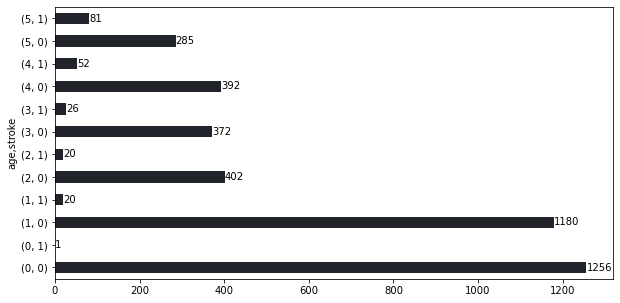

In [492]:
ratioPlot(df,'age')

As can be seen, with greater age comes higher probability of being victim of a stroke

### Hypertension and heart disease

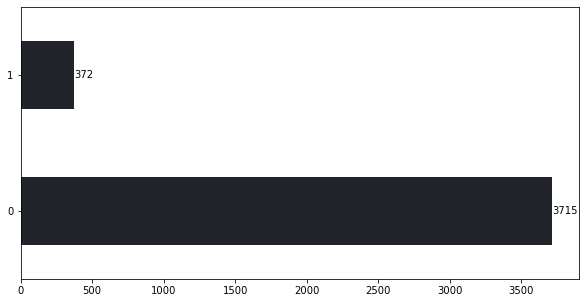

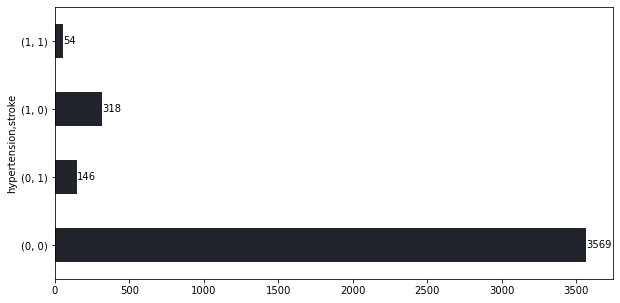

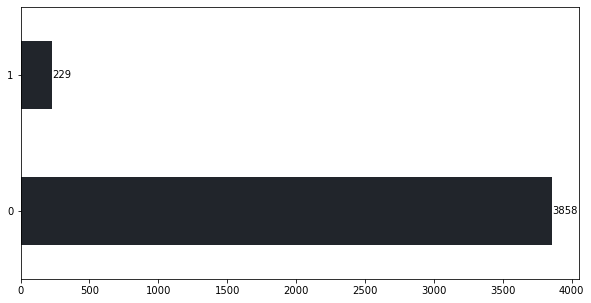

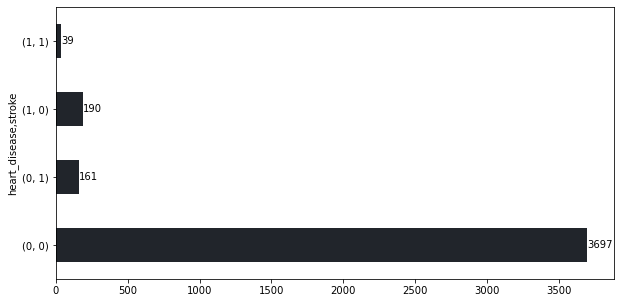

In [493]:
ratioPlot(df,"hypertension"),
ratioPlot(df,"heart_disease")

In [494]:
ratioPrint(df,"hypertension"),
print(),print(),
ratioPrint(df,"heart_disease")

LABELS
  0 -> 3715 , 90%
  1 -> 372 , 9%

LABELS WITH STROKE
  (0, 0) -> 3569 , 87% 96%
  (0, 1) -> 146 , 3% 3%
  (1, 0) -> 318 , 7% 85%
  (1, 1) -> 54 , 1% 14%


LABELS
  1 -> 3858 , 94%
  0 -> 229 , 5%

LABELS WITH STROKE
  (0, 0) -> 3697 , 90% 95%
  (0, 1) -> 161 , 3% 4%
  (1, 0) -> 190 , 4% 82%
  (1, 1) -> 39 , 0% 17%


Hypertension and heart disease affect greatly the chance of patient having a stroke  
Maybe patients with both of these will have even greater chance?

In [495]:
def merge_cols(x,y):
    if x == 1 and y == 1:
        return 1
    else:
        return 0

df["hypertension and heart-disease"] = df.apply(lambda x: merge_cols(x["hypertension"],x["heart_disease"]),axis = 1)
ratioPrint(df,"hypertension and heart-disease")

LABELS
  0 -> 4038 , 98%
  1 -> 49 , 1%

LABELS WITH STROKE
  (0, 0) -> 3849 , 94% 95%
  (0, 1) -> 189 , 4% 4%
  (1, 0) -> 38 , 0% 77%
  (1, 1) -> 11 , 0% 22%


The chance is a bit higher

### Ever Married

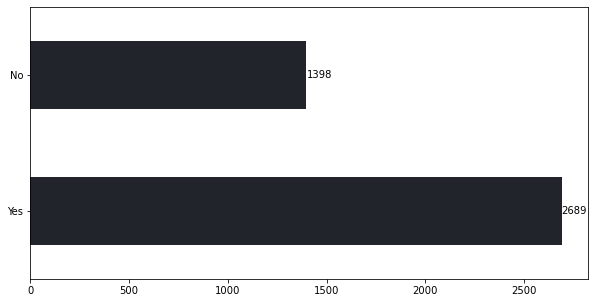

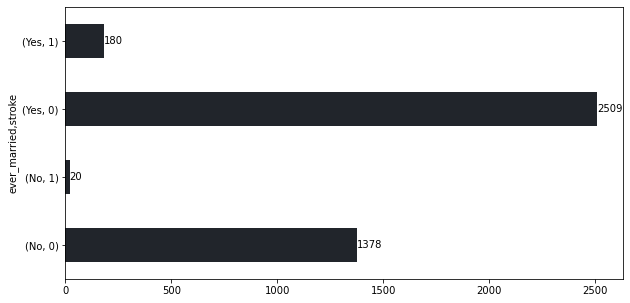

In [499]:
ratioPlot(df,"ever_married")

In [500]:
ratioPrint(df,'ever_married')

LABELS
  Yes -> 2689 , 65%
  No -> 1398 , 34%

LABELS WITH STROKE
  ('No', 0) -> 1378 , 33% 98%
  ('No', 1) -> 20 , 0% 1%
  ('Yes', 0) -> 2509 , 61% 93%
  ('Yes', 1) -> 180 , 4% 6%
